In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NSCH = pd.read_csv("NSCH.csv")

Subsets to Wisconsin only

In [3]:
NSCHWI = NSCH[NSCH["FIPSST"] == 55].copy()

Has a MEDB Problem vs Not (WI)

In [4]:
NSCHWI["NewMEDB"] = NSCHWI["MEDB10ScrQ5_22"].replace(95, pd.NA)
NSCHWI = NSCHWI.dropna(subset=["NewMEDB"])

In [10]:
MEDBTable = NSCHWI["NewMEDB"].value_counts(normalize=True).mul(100)
MEDBTable.index = ["No MEDB Problem", "MEDB Problem"][:len(MEDBTable)]

In [9]:
MEDBTable

No MEDB Problem    71.856287
MEDB Problem       28.143713
Name: proportion, dtype: float64

Urban vs Rural (WI)

In [11]:
NSCHWI["NewMetro"] = NSCHWI["METRO_YN"]

In [14]:
UrbRurTable = NSCHWI["NewMetro"].value_counts(normalize=True).mul(100)
UrbRurTable.index = ["Urban", "Rural"][:len(UrbRurTable)]

In [13]:
UrbRurTable

Urban    77.54491
Rural    22.45509
Name: proportion, dtype: float64

Received MHC vs Not (WI)

In [17]:
#Combines all "No because ___" to just one "No" value
NSCHWI["NewMentHCare"] = NSCHWI["MentHCare_22"].replace(99, pd.NA).replace(3, 2)
NSCHWI = NSCHWI.dropna(subset=["NewMentHCare"])

In [20]:
MHCTable = NSCHWI["NewMentHCare"].value_counts(normalize=True).mul(100)
MHCTable.index = ["Did Not Receive MH Care", "Received MH Care"][:len(MHCTable)]

In [21]:
MHCTable

Did Not Receive MH Care    88.253012
Received MH Care           11.746988
Name: proportion, dtype: float64

MEDB Problem w/ Urban/Rural Status (WI)

In [ ]:
MEBDURTable = pd.crosstab(NSCHWI["NewMetro"], NSCHWI["NewMEDB"], normalize=True).mul(100)

In [ ]:
row_map = {1: "Urban", 2: "Rural"}
col_map = {1: "MEBD Problem", 2: "No MEBD Problem"}

MEBDURTable = MEBDURTable.rename(index=row_map, columns=col_map)


In [31]:
MEBDURTable

NewMEDB,MEBD Problem,No MEBD Problem
NewMetro,,
Urban,22.439759,54.969880
Rural,5.572289,17.018072


Entire US Comparison

In [51]:
NSCH["NewMEDB"] = NSCH["MEDB10ScrQ5_22"].replace(95, pd.NA)
NSCH["NewMetro"] = NSCH["METRO_YN"].replace(96, pd.NA)
NSCH_US = NSCH.dropna(subset=["NewMEDB", "NewMetro"])

USMEBDURTable = pd.crosstab(NSCH_US["NewMetro"], NSCH_US["NewMEDB"], normalize=True).mul(100)
USMEBDURTable = USMEBDURTable.rename(index=row_map, columns=col_map)


In [52]:
USMEBDURTable

NewMEDB,MEBD Problem,No MEBD Problem
NewMetro,,
Urban,22.716901,59.346021
Rural,5.163373,12.773705


Received MHC w/ Urban/Rural Status (WI)

In [49]:
URMHCTable = pd.crosstab(NSCHWI["NewMetro"], NSCHWI["NewMentHCare"], normalize=True).mul(100)
URMHCTable = URMHCTable.rename(index=row_map, columns=col_map)

In [50]:
URMHCTable

NewMentHCare,MEBD Problem,No MEBD Problem
NewMetro,,
Urban,9.638554,67.771084
Rural,2.108434,20.481928


Frequency table

In [54]:
URMHCTableFreq = pd.crosstab(NSCHWI["NewMetro"], NSCHWI["NewMentHCare"])
print("\nURMHCTableFreq:\n", URMHCTableFreq)


URMHCTableFreq:
 NewMentHCare   1    2
NewMetro             
1             64  450
2             14  136


Quick math for below table viz

In [56]:
print(64 + 14)
print(64 / 78)
print(14 / 78)

78
0.8205128205128205
0.1794871794871795


In [62]:
RecMHCTable = pd.DataFrame(
    [[82.05128, 17.94872]],
    columns=["Urban", "Rural"],
    index=["Received MHC"]
)

print(RecMHCTable)


                 Urban     Rural
Received MHC  82.05128  17.94872


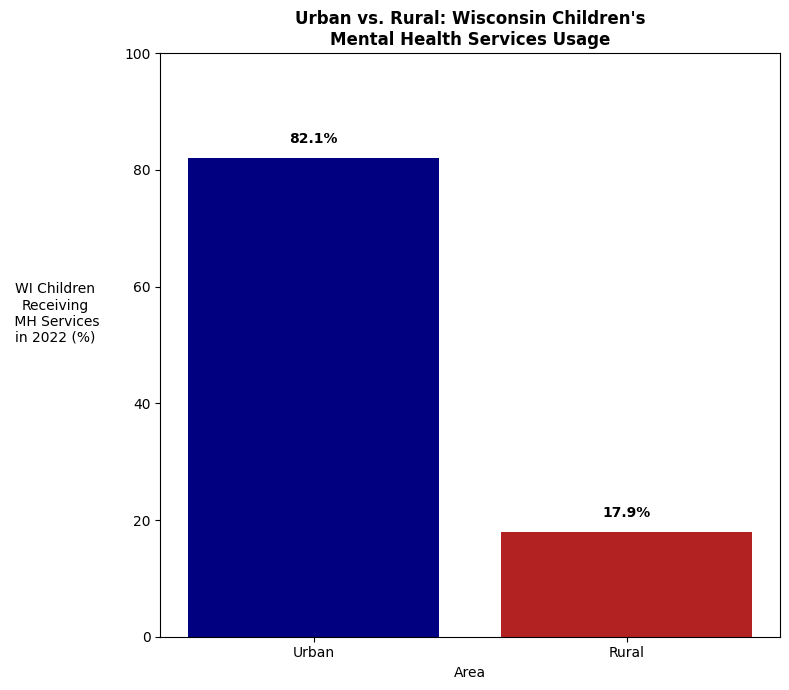

In [65]:
plt.figure(figsize=(8, 7))

bars = plt.bar(
    RecMHCTable.columns,        # ["Urban", "Rural"]
    RecMHCTable.iloc[0],        # [82.05128, 17.94872]
    color=["navy", "firebrick"] # Urban = blue, Rural = red
)

plt.title(
    "Urban vs. Rural: Wisconsin Children's\nMental Health Services Usage",
    weight="bold"
)
plt.xlabel("Area")
plt.ylabel(
    "WI Children\nReceiving\n MH Services\nin 2022 (%)",
    rotation=0,   # horizontal
    labelpad=50
)

plt.ylim(0, 100)
plt.yticks(range(0, 101, 20))

# Labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        weight="bold"
    )

plt.tight_layout()
plt.savefig("test.png", dpi=300, facecolor="white")
plt.show()
